# Homework 3 - Runge-Kutta method

## Problem:

Solve the Cauchy problem for the zero-order Bessel equation:  
Решить задачу Коши для уравнения Бесселя нулевого порядка: 
$$
\begin{array}{lcl}
x^2*y''+xy'+x^2*y=0 \\
y(0) = 1 \\
y'(0) = 0
\end{array}
$$

Using the fourth-order Runge-Kutta method, with an adaptive step.    
Draw the solution, compare it with exact one, output the step h.  

Методом Рунге-Кутта четвёртого порядка, с адаптивным шагом.  
Нарисовать решение, сравнить с точным, выводить шаг(h).

## Fourth-order Runge Kutta method

A classical method for integrating ODEs with a high order of accuracy is the **Fourth Order Runge Kutta** (RK4) method. It is obtained from the Taylor series. This method uses four points $k_1, k_2, k_3$, and $k_4$. A weighted average of these is used to produce the approximation of the solution. The formula is as follows:

Классическим методом интегрирования ОДУ с высоким порядком точности является метод **Рунге Кутты четвертого порядка** (RK4). Он получается из ряда Тейлора. Этот метод использует четыре точки $k_1, k_2, k_3$ и $k_4$. Их средневзвешенное значение используется для получения аппроксимации решения. Формула следующая:

$$
\begin{array}{rcl}
k_1 & = & f(x_j,y_j)\\
k_2 & = & f\left(x_j+\frac{h}{2},y_j+\frac{1}{2}k_1h\right)\\
k_3 & = & f\left(x_j+\frac{h}{2},y_j+\frac{1}{2}k_2h\right)\\
k_4 & = & f(x_j+h,y_j+k_3h)
\end{array}
$$

$k_1$ - calculation at the beginning of the interval;  
$k_2$ - calculation at the middle of the interval using $k_1$;  
$k_3$ - calculation at the middle of the interval using $k_2$;  
$k_4$ - calculation at the end of the interval using $k_3$.  

Therefore, we will have:

Следовательно, у нас будет:

$$
y(x_{j+1}) = y_j + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).
$$

## Adaptive step
**The adaptive step** in the Runge-Kutta method is a technique used to change the size of the integration step depending on the accuracy requirements of the solution. In standard Runge-Kutta methods, the integration step is fixed, which can lead to excessive computational time or insufficient accuracy, especially in cases where the behavior of the solution changes dramatically.  

**Адаптивный шаг** в методе Рунге-Кутта — это техника, используемая для изменения размера шага интегрирования в зависимости от требований к точности решения. В стандартных методах Рунге-Кутта шаг интегрирования фиксирован, что может приводить к излишнему вычислительному времени или недостаточной точности, особенно в случаях, когда поведение решения изменяется резко.  


`To change the adaptive step size` in the Runge-Kutta method, error estimation at the current step is used. The key steps are:  

1. **Compute the solution at step size  `h` and at half step  `h/2`.** This helps assess the accuracy of the calculations.

2. **Estimate the error**, for example, as the difference between the result at step `h` and twice the result at half-step `h/2`:

$$
\text{error} = |y_h - 2y_{h/2}|
$$

3. **Compare the error with the allowed tolerance**. If the error is larger than the tolerance, reduce the step size; if smaller, increase the step size.

**Step size adjustment**:
- If the error is too large, reduce the step size or `error > tol`:
   $$
   h_{\text{new}} = 0.9 \cdot h \cdot \left(\frac{\text{tol}}{\text{error}}\right)^{0.25}
   $$
- If the error is too small, increase the step size or `error ≤ tol`:  
   $$
   h_{\text{new}} = 0.9 \cdot h \cdot \left(\frac{\text{tol}}{\text{error}}\right)^{0.2}
   $$


`Чтобы изменять адаптивный шаг` в методе Рунге-Кутта, используют оценку ошибки на текущем шаге. Основные шаги:

1. **Вычислить решение на шаге `h` и на половине шага `h/2`.** Это позволяет оценить точность вычислений.

2. **Оценить ошибку**: например, как разницу между результатами на шаге `h` и удвоенным результатом на шаге `h/2`.

3. **Сравнить ошибку с допустимой погрешностью (tolerance)**. Если ошибка больше допустимой, уменьшаем шаг, если меньше — увеличиваем.

4. **Корректировка шага**:  
- Если ошибка слишком велика, уменьшите размер шага.  
- Если ошибка слишком мала, увеличьте размер шага.  

Это позволяет адаптивно менять шаг, делая его меньше при больших ошибках и больше при маленьких.

## Solution:

We should first convert equation to a system of first order equations:
$$
\begin{array}{lcl}
y' = v  \\
x^2*v' + xv + x^2*y = 0  \\
x^2*v' = -xv - x^2*y  \\
v' = (-xv  - x^2*y)/x^2
\end{array} 
$$
And we have:
$$
\begin{array}{lcl} 
y' = v  \\
v' = - v/x - y
\end{array}  
$$

And then we should use the fourth-order Runge-Kutta method.

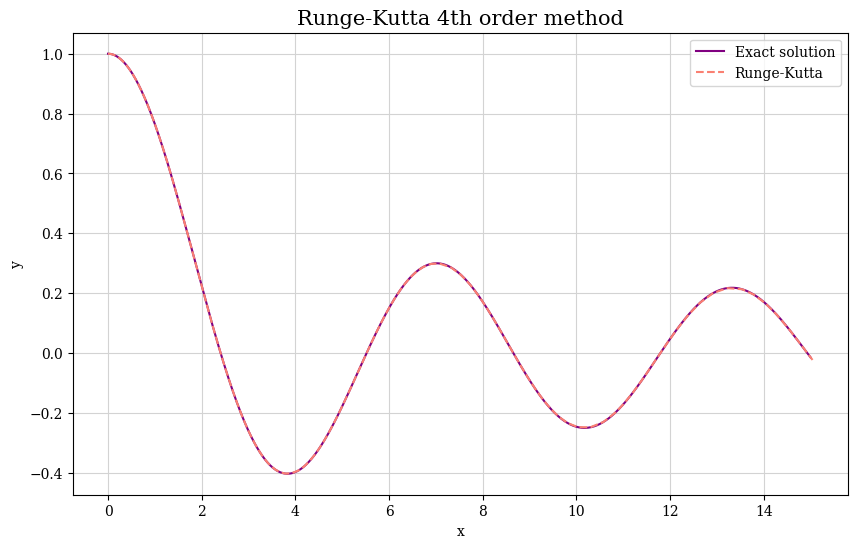

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# zero-order Bessel equation
def f(yv, x):
    y, v = yv
    dydx = np.array([v, -v/x - y]) #the first and the second derivatives
    return dydx

def kkkk(h, yv, x):
    k1 = f(yv, x)
    k2 = f(yv + k1*h/2, x + h/2)
    k3 = f(yv + k2*h/2, x + h/2)
    k4 = f(yv + k3*h, x + h)
    yv = yv + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return yv

# the function of the fourth-order Runge-Kutta method
def RK4(f,  x0, yv0, h0, x_end, tol):
    h = h0
    x = x0
    yv = np.array(yv0)
    
    all_x = [x]
    all_y = [yv[0]] # store only y (without v)

    while x < x_end:
        yv1 = kkkk(h, yv, x) # weighted average
        
        h_half = h/2
        yv2 = kkkk(h_half, yv, x)
        yv2 = kkkk(h_half, yv2, x)

        error = abs(yv1[0] - yv2[0]) 
        if error > tol:
            h = h * 0.9 * (tol / error)**0.25
        else:
            x = x + h
            yv = yv1
            all_x.append(x)
            all_y.append(yv[0])
            h = h * 0.9 * (tol / error)**0.2

    return all_x, all_y

#initial conditions
x0 = 1e-5 # to prevent division by zero
x_end = 15
yv0 = [1, 0] #y(0) = 1; y'(0) = v(0) = 0
h0 = 0.01
tol = 1e-6
N = int((x_end-x0)/h0)+1 # number of steps

# finding solutions
x_rk, y_rk = RK4(f, x0, yv0, h0, x_end, tol)        
exact_x = np.linspace(x0, x_end, N)
exact_yv = odeint(f, yv0, exact_x)
exact_y = exact_yv[:, 0] #all rows, 0th column -> y

# plotting
plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "serif" # font
plt.grid(True, color='lightgray')
plt.title('Runge-Kutta 4th order method', fontsize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(exact_x, exact_y, color='purple', label='Exact solution')
plt.plot(x_rk, y_rk, color='salmon', linestyle='--', label='Runge-Kutta')
plt.legend()
plt.show()